<a href="https://colab.research.google.com/github/mto0501/Portfolio-Tech-Allocation-sample/blob/main/Portfolio_optimazation_tech_stocks_with_pyPortfolioOpt_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')

In [ ]:
#Get the tickers in portfolio
assets = ["TSLA","SPOT","SQ","PINS","JD"]

In [ ]:
#Assign weights to the stocks. 
weights = np.array([0.2,0.2,0.2,0.2,0.2])

In [ ]:
#Get the stocks start date
StockStartDate = '2019-01-01'

In [ ]:
#Get the stock ending date
today = datetime.today().strftime("%Y-%m-%d")


In [ ]:
#Create a dataFrame to store the adjusted close price of the stocks
df = pd.DataFrame()

#Store the adjusted close price of the stock into the df
for stock in assets:  
  df[stock] = web.DataReader(stock,data_source = 'yahoo',start = StockStartDate ,end = today)["Adj Close"]

In [ ]:
# Show the data frame
df

,TSLA,SPOT,SQ,PINS,JD
Date,,,,,
2019-01-02,62.023998,113.739998,57.200001,NaN,21.270000
2019-01-03,60.071999,109.019997,52.419998,NaN,20.350000
2019-01-04,63.537998,118.510002,58.180000,NaN,22.270000
2019-01-07,66.991997,119.360001,60.720001,NaN,22.760000
2019-01-08,67.070000,117.480003,63.119999,NaN,22.950001
...,...,...,...,...,...
2021-05-25,604.690002,236.759995,216.199997,63.759998,72.809998
2021-05-26,619.130005,238.389999,222.339996,62.939999,73.199997
2021-05-27,630.849976,240.259995,220.899994,64.300003,72.830002


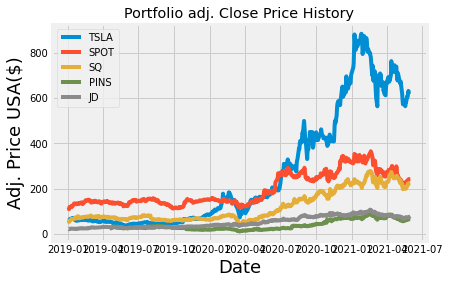

<Figure size 432x288 with 0 Axes>

In [ ]:
#Visually show the stock portfolio:
title = "Portfolio adj. Close Price History"

# Get the stocks
my_stocks = df

# Create and plot the graph

for c in my_stocks.columns.values:
  plt.plot(my_stocks[c],label =c)

plt.title(title)
plt.xlabel("Date", fontsize = 18)
plt.ylabel('Adj. Price USA($)', fontsize = 18)
plt.legend(my_stocks.columns.values, loc ='upper left')
plt.show()

In [ ]:
 #Show daily simple return
 returns = df.pct_change()
 returns

,TSLA,SPOT,SQ,PINS,JD
Date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.031472,-0.041498,-0.083566,NaN,-0.043253
2019-01-04,0.057697,0.087048,0.109882,NaN,0.094349
2019-01-07,0.054361,0.007172,0.043658,NaN,0.022003
2019-01-08,0.001164,-0.015751,0.039526,NaN,0.008348
...,...,...,...,...,...
2021-05-25,-0.002886,0.011535,0.024887,0.013511,0.016048
2021-05-26,0.023880,0.006885,0.028400,-0.012861,0.005356
2021-05-27,0.018930,0.007844,-0.006477,0.021608,-0.005055


In [ ]:
# Annualized covariance matric
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,TSLA,SPOT,SQ,PINS,JD
TSLA,0.506169,0.127570,0.195006,0.182346,0.117803
SPOT,0.127570,0.233384,0.129888,0.118790,0.076684
SQ,0.195006,0.129888,0.354102,0.207585,0.115280
PINS,0.182346,0.118790,0.207585,0.524465,0.124657
JD,0.117803,0.076684,0.115280,0.124657,0.200136


In [ ]:
# Calculate the portfolio variance 
port_variance = np.dot(weights.T,np.dot(cov_matrix_annual,weights))
port_variance

0.18437890997440703

In [ ]:
# Caculate the portfolio volatility aka standard deviation 
port_volatility = np.sqrt(port_variance)
port_volatility

0.42939365385902833

In [ ]:
# Calculate the annual portfolio return
portfolio_simple_annual_return =np.sum(returns.mean()*weights) *252
portfolio_simple_annual_return

0.7499101853128439

In [ ]:
# Show the expected annual return, volatility(risk), and variance

percent_var = str(round(port_variance,2)*100) + "%"
percent_vols = str(round(port_volatility,2)*100) + "%"
percent_ret = str(round(portfolio_simple_annual_return,2)*100) + "%"

print("Expected annual return: "+ percent_ret)
print("Annual volatility/risk: "+ percent_vols)
print("Annual variance: "+ percent_var)

Expected annual return: 75.0%
Annual volatility/risk: 43.0%
Annual variance: 18.0%


In [ ]:
## Better way to create the portfolio

In [ ]:
pip install pyPortfolioOpt

     |████████████████████████████████| 61kB 3.8MB/s 
     |████████████████████████████████| 1.3MB 7.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for cvxpy: filename=cvxpy-1.1.13-cp37-cp37m-linux_x86_64.whl size=2736151 sha256=4f8b1684241bd036499926daa3764a655d4ada32b3c242bc21d8387af0e1bad9
  Stored in directory: /root/.cache/pip/wheels/f9/78/00/f29636789ee83434953b5442f16ec3f9834a68e7fd0393c220
Successfully built cvxpy
  Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [ ]:
# Portfolio Optimization!
# Calculate the expected returns and the annualized sample covariance matrix of asset returns

mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

#Optimize for max sharpe ratio 

ef =  EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('TSLA', 0.5889), ('SPOT', 0.0), ('SQ', 0.0), ('PINS', 0.0), ('JD', 0.4111)])
Expected annual return: 124.4%
Annual volatility: 51.6%
Sharpe Ratio: 2.37


(1.2440000126862014, 0.5161417092644205, 2.3714417779384376)

In [ ]:
0.5889 + 0.0 + 0.0 +  0.0 + + 0.0 + 0.4111

1.0

In [ ]:
# Get the descete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights,latest_prices,total_portfolio_value=10000)
allocation,leftover = da.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'TSLA': 9, 'JD': 53}
Funds remaining: $217.20
